
# HR Analytics Project- Understanding the Attrition in HR

## DATA COLLECTION

In [1]:
#importing the basic library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data and printing the first 5 rows of the data
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
#displaying the bottom 5 rows of the dataset
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In this data we can see that the Dependent variable "Attrition" is Categorical Nominal type,

> So we can say its a classification(Logistic regression) problem.



## EXPLORATORY DATA ANALYSIS

In [4]:
#displaying the column names 
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

We can see that the "Attrition" is **DEPENDENT VARIABLE** and all other 34 columns 'Age','BusinessTravel', 'DailyRate' ,'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' are **INDEPENDENT VARIABLE**

In [5]:
#displaying the number of columns and number of rows 
df.shape

(1470, 35)

We have 35 variables with 1470 records

In [6]:
#checking the data type of all varialbe 
data_type=df.dtypes
data_type

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#counting the number of data type present 
data_type.value_counts()

int64     26
object     9
dtype: int64

We can see that there are 25 variable with numerical type and 9 variable with categorical type

In [8]:
#displaying the information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#checking wheather null value is present or not 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that there are no null value present in our data set 

In [10]:
#displaying the maximum and minimum and the total unique element in numerical column
for i in df.columns:
  if df[i].dtype != 'object':
    print(f'===== Column: {i} =====')
    print('MAX : ',df[i].max())
    print('MIN : ',df[i].min())
    print("Number of unique value: ",df[i].nunique())
    print('\n\n') 

===== Column: Age =====
MAX :  60
MIN :  18
Number of unique value:  43



===== Column: DailyRate =====
MAX :  1499
MIN :  102
Number of unique value:  886



===== Column: DistanceFromHome =====
MAX :  29
MIN :  1
Number of unique value:  29



===== Column: Education =====
MAX :  5
MIN :  1
Number of unique value:  5



===== Column: EmployeeCount =====
MAX :  1
MIN :  1
Number of unique value:  1



===== Column: EmployeeNumber =====
MAX :  2068
MIN :  1
Number of unique value:  1470



===== Column: EnvironmentSatisfaction =====
MAX :  4
MIN :  1
Number of unique value:  4



===== Column: HourlyRate =====
MAX :  100
MIN :  30
Number of unique value:  71



===== Column: JobInvolvement =====
MAX :  4
MIN :  1
Number of unique value:  4



===== Column: JobLevel =====
MAX :  5
MIN :  1
Number of unique value:  5



===== Column: JobSatisfaction =====
MAX :  4
MIN :  1
Number of unique value:  4



===== Column: MonthlyIncome =====
MAX :  19999
MIN :  1009
Number of unique value:  1

We can see that in above Numerical column we can see that both continious and discrete type of data type is present in our data set 

> We can drop '**employee count**' column as it has same value for every one

> We can drop '**employee number**' as it a unique id number

> We can drop '**standard hours**' column as it has same value for every one 







In [11]:
#checking the count of unique value in categorical column
for i in df.columns:
  if df[i].dtype == 'object':
    print(f'===== column: {i} =====')
    print('unique element and there frequency are as follows \n',df[i].value_counts())
    print('Number of unique element present: ',df[i].nunique())
    print('\n\n')

===== column: Attrition =====
unique element and there frequency are as follows 
 No     1233
Yes     237
Name: Attrition, dtype: int64
Number of unique element present:  2



===== column: BusinessTravel =====
unique element and there frequency are as follows 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Number of unique element present:  3



===== column: Department =====
unique element and there frequency are as follows 
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Number of unique element present:  3



===== column: EducationField =====
unique element and there frequency are as follows 
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Number of unique element present:  6



===== column: Gender =====
unique 

From above we can see that in categorical both nominal and ordinal type of data is present in our data set

> Data imbalance is present in our '**DEPENDENT VARIABLE**'

> column '**over 18** ' has same value for every one so we can drop that column 




In [12]:
#looking at statistical information of Numerical type of data set
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
#looking at the statistical information of categorical type of data set 
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


From above 2 tables we can see that 

> There are no negative values present in our data set

> There is no float values present, all data type is either int or float

> Difference between **Mean** and **50**% is low. **25**% and **min**, **75%** and **max** difference is low. From which we can say that there is no such major outlier

> The difference of **MAX** and **MIN** (Range) is considerable which indicates that the data is not skewed much

# Univariate analysis

In [14]:
#storing numerical and categorical values separately
num_col=['Age', 'DailyRate','DistanceFromHome', 'Education', 'EmployeeCount','EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
'JobInvolvement', 'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating',
'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany',
'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
cat_col=['Attrition',	'BusinessTravel',	'Department',	'EducationField',	'Gender',	'JobRole',	'MaritalStatus',	'Over18',	'OverTime']

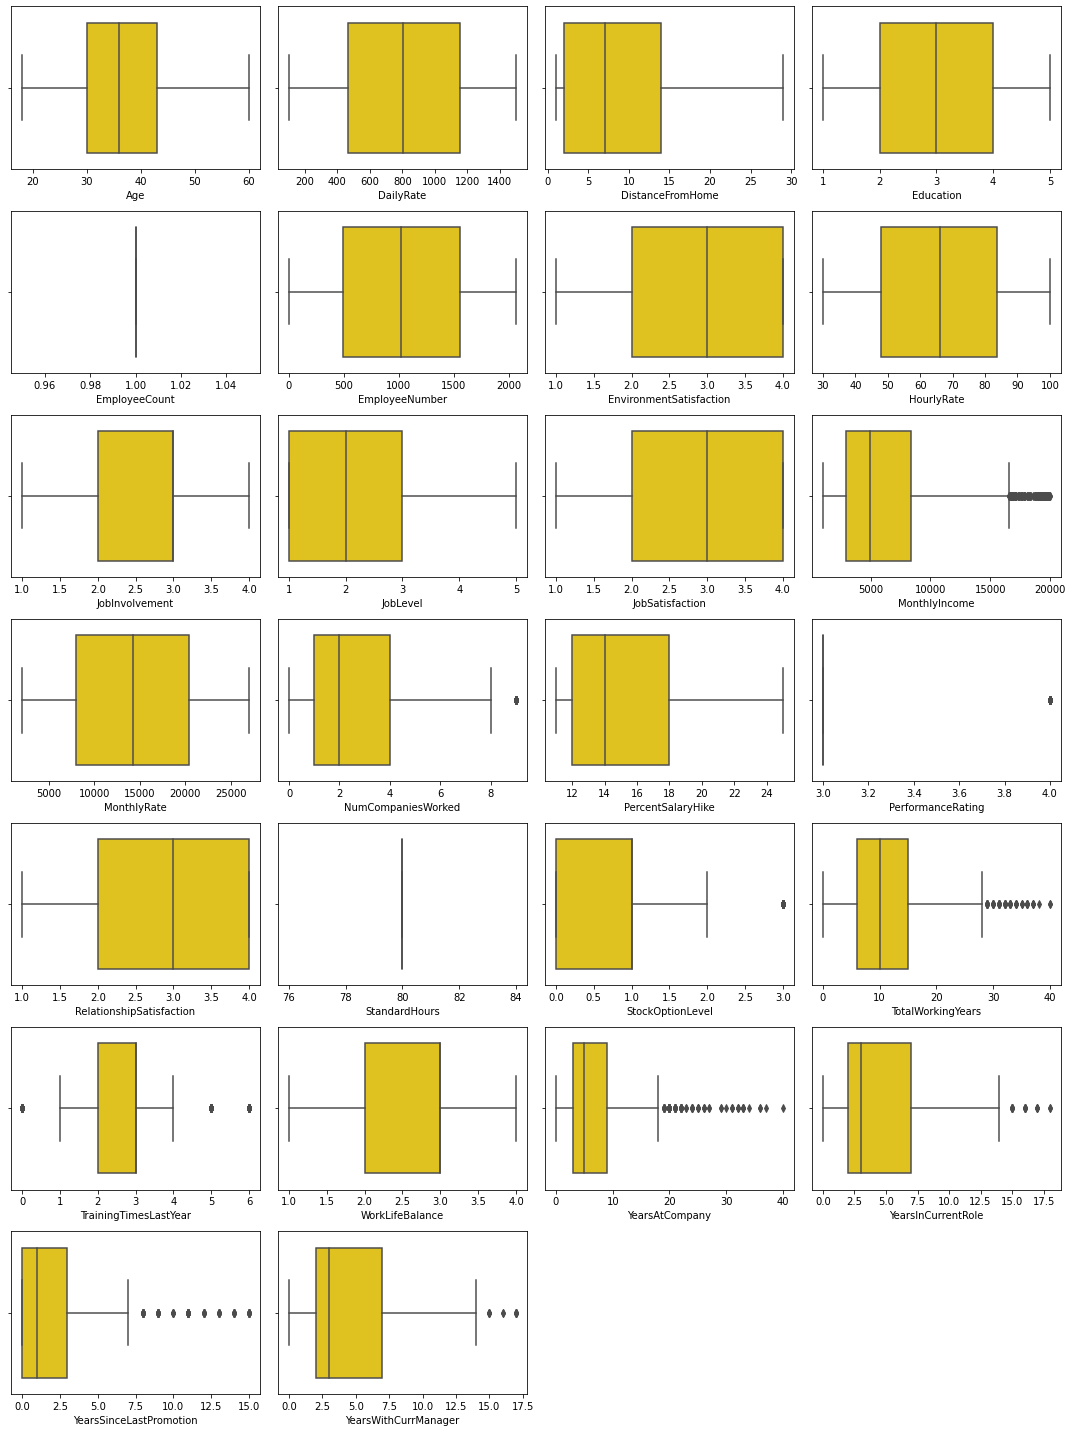

In [15]:
#plotting box curve for numerical column
plt.figure(figsize=(15,20))
for i,col in enumerate(num_col):
  plt.subplot(7,4,i+1)
  sn.boxplot(df[col],color='gold')
  plt.tight_layout()

We can see that the outlier are having continious patren and not away from whiskers but only in perfornamce 'rating', 'stock  option level', 'Training times last year' has some outlier. 

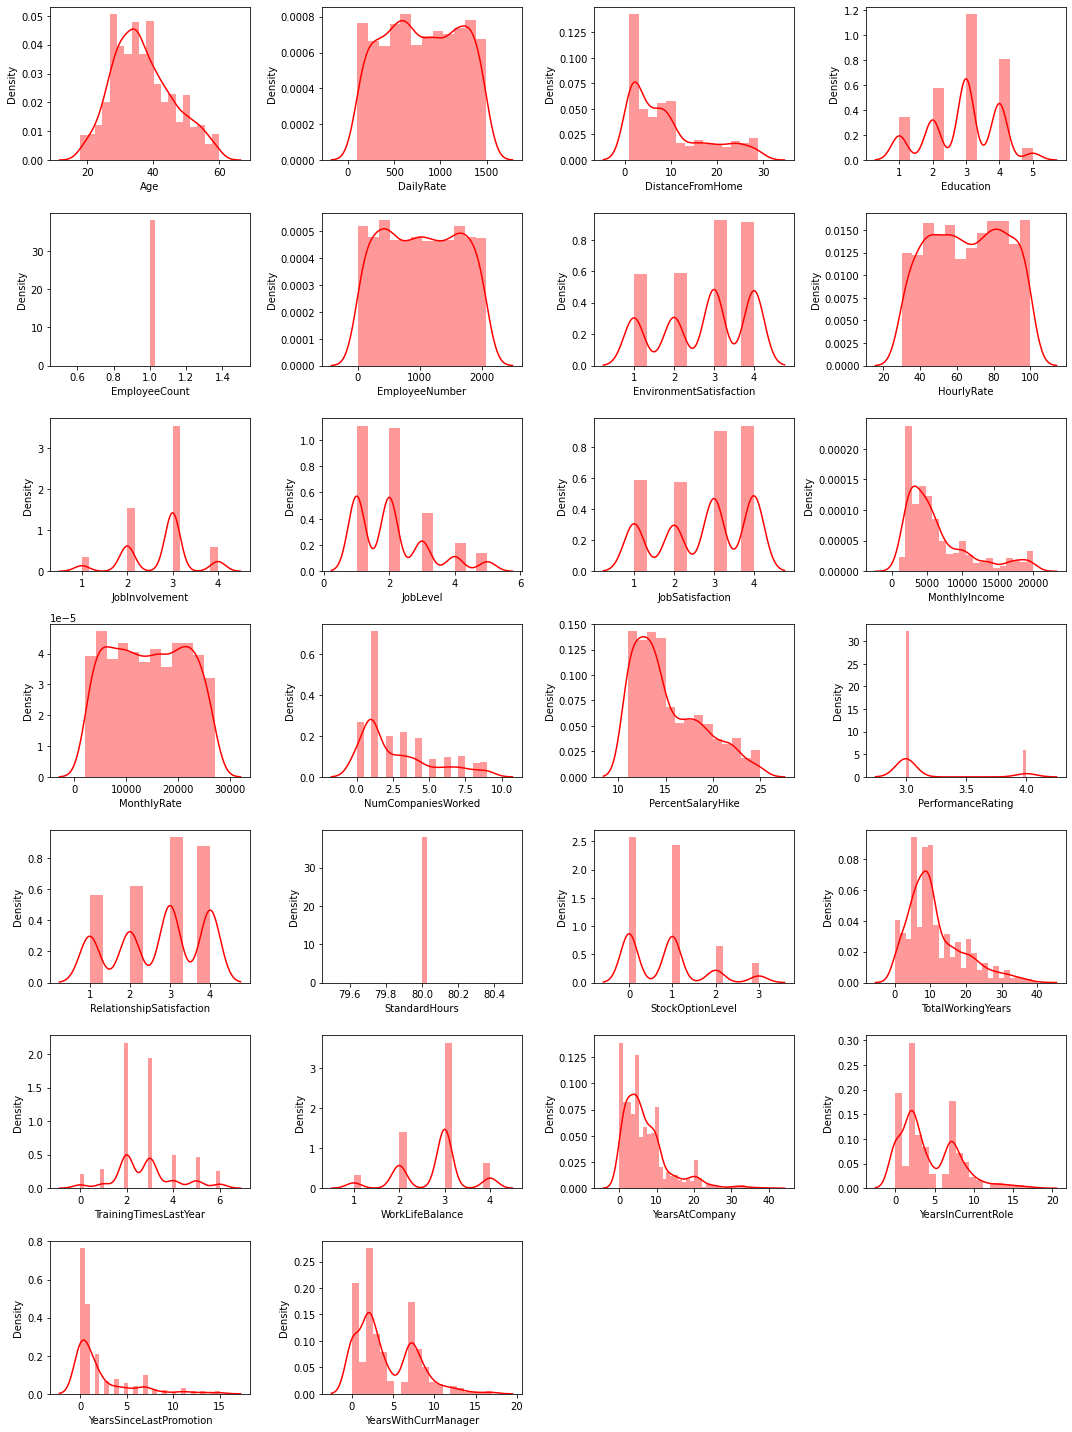

In [16]:
#plotting distribution curve for numerical column
plt.figure(figsize=(15,20))
for i,col in enumerate(num_col):
  plt.subplot(7,4,i+1)
  sn.distplot(df[col],color='red')
  plt.tight_layout()

We can see that from above table that the column with numeric value are kind of catogorical type but not continious value 

> we have numerical continious/discrete value in column 'Age', 'Daily rate', 'Distance from home', 'employee number', 'Hourly rate', 'Monthly income', 'Monthly rate', 'Number of companies worked', 'Percentage salary hike', 'Total working years','year at company', 'year in current role','year with current manager'  




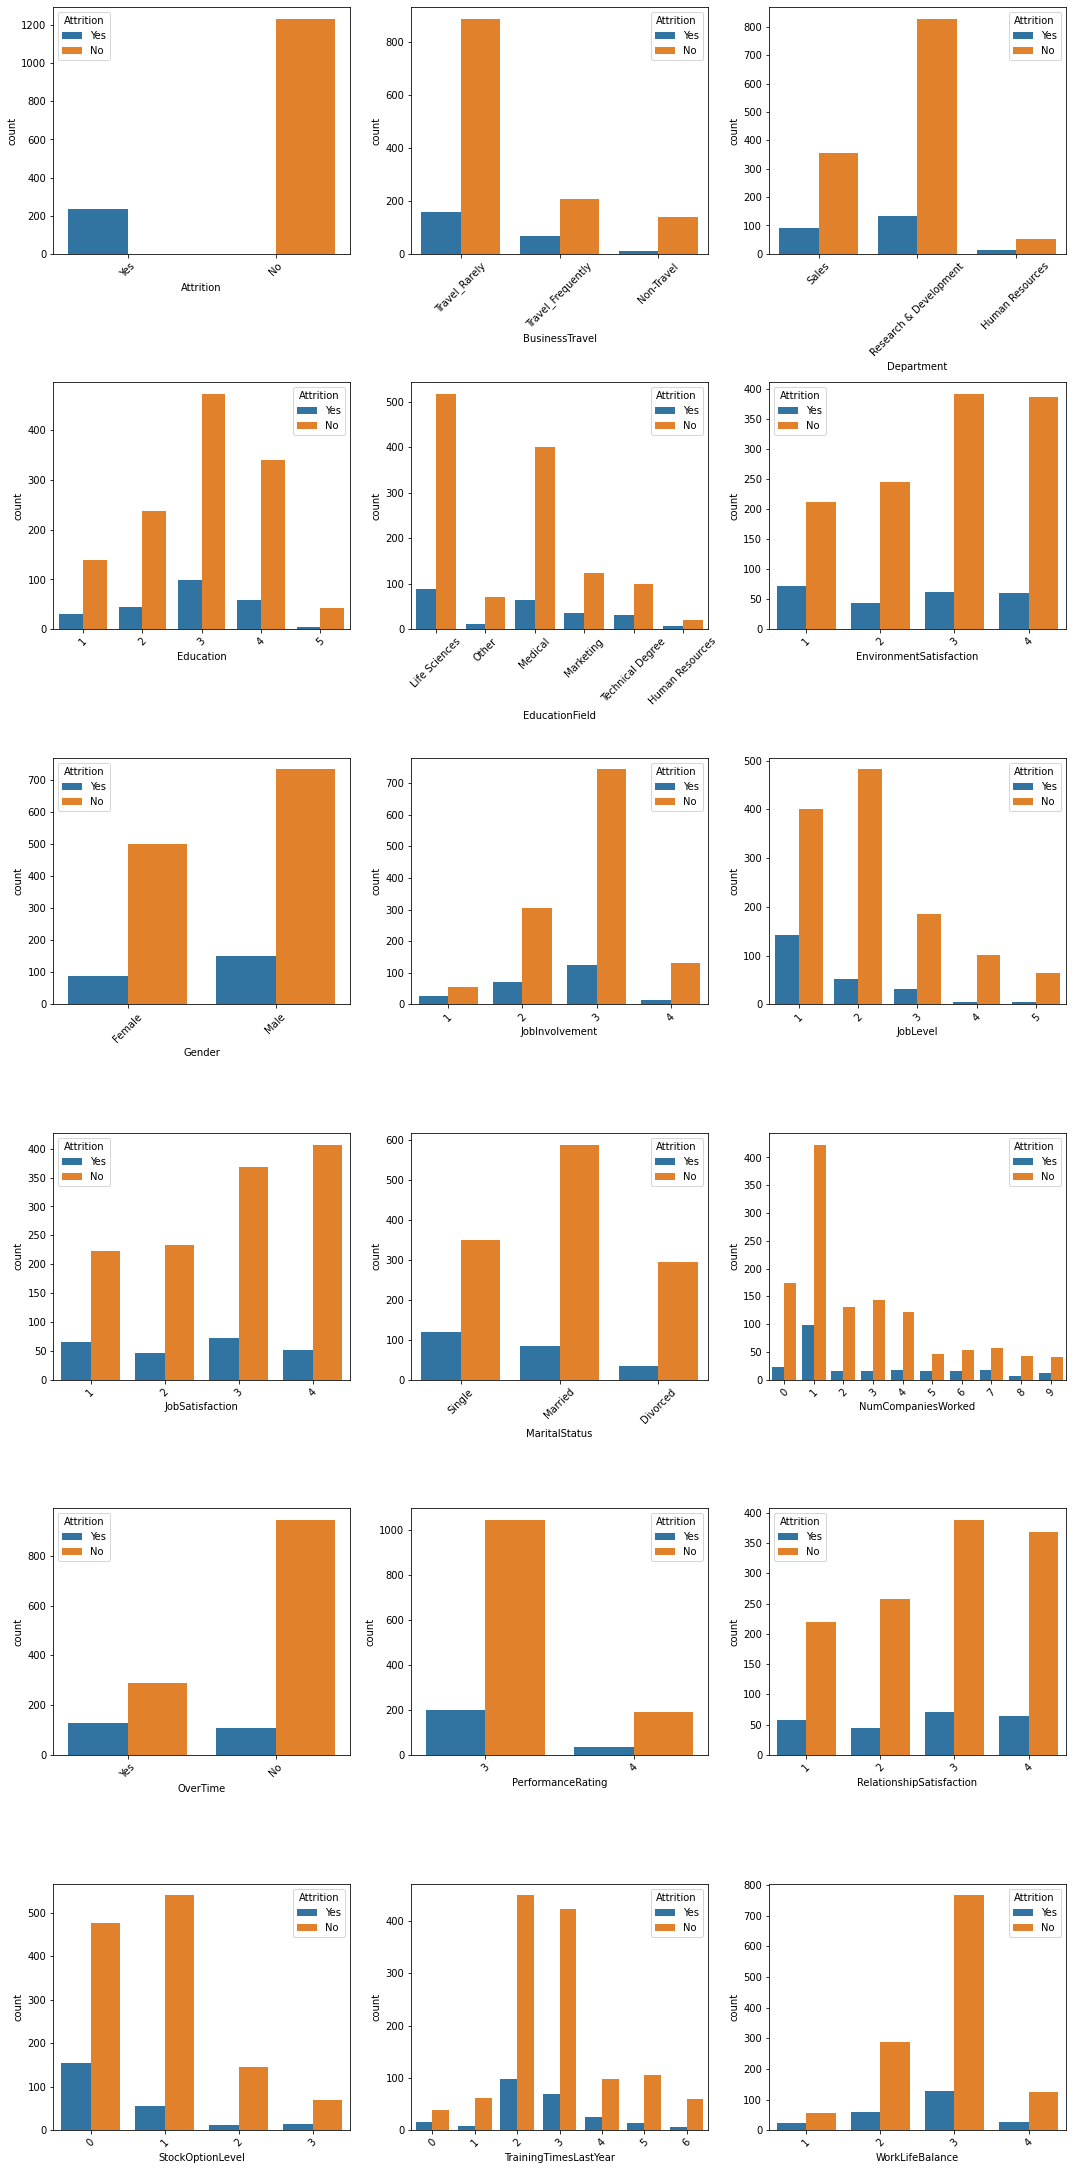

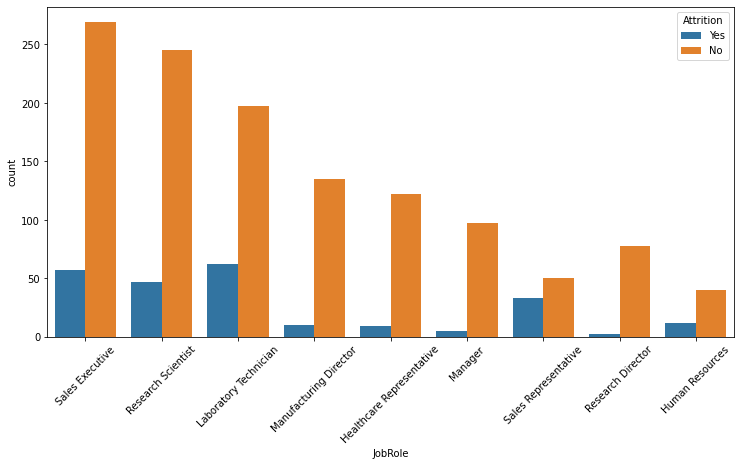

In [17]:
#plotting count plot for catogorical ordinal and nominal type
cat_col=['Attrition', 'BusinessTravel','Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender','JobInvolvement', 
'JobLevel', 'JobSatisfaction','MaritalStatus','NumCompaniesWorked', 'OverTime','PerformanceRating','RelationshipSatisfaction',
'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'JobRole']

plt.figure(figsize=(15,35))
for i,col in enumerate(cat_col):
  if i != 18:
    plt.subplot(7,3,i+1)
    sn.countplot(df[col],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.tight_layout()
  else:
    plt.figure(figsize=(30,35))
    plt.subplot(7,3,i+1)
    sn.countplot(df[col],hue='Attrition',data=df)
    plt.xticks(rotation=45)
    plt.tight_layout()
   

We can see that the data imbalance is present in our dependent variable it has to be treated before modle building

> Attrition Yes is low in every graph and it is present in all graph that means in every sector small amount of people is leaving the company

> If job satisfaction is high then they are unlikely to leave the company

> we can see people sticking to this company itself is more in all aspect.




## Bivariate analysis

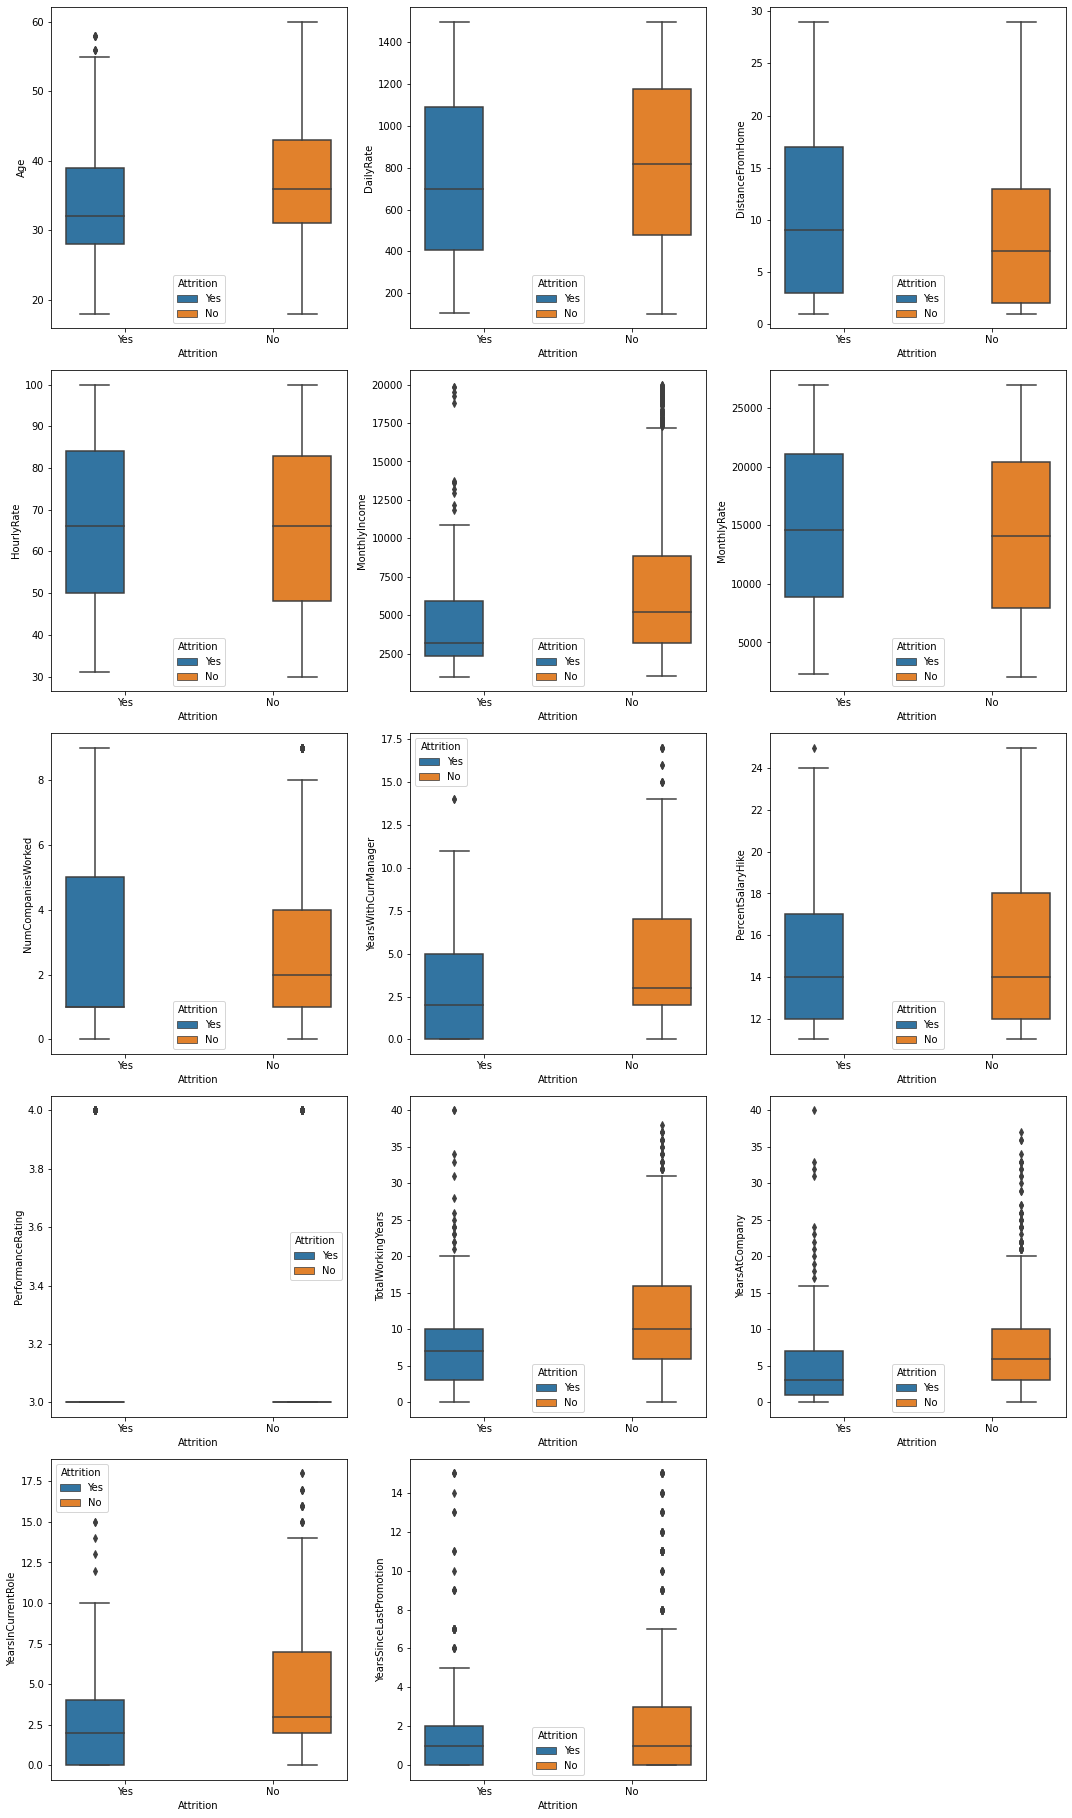

In [18]:
#plotting box plot for catogorical column vs attrition
cat_col=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','YearsWithCurrManager',
         'PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', ]

plt.figure(figsize=(15,35))
for i,col in enumerate(cat_col):
    plt.subplot(7,3,i+1)
    sn.boxplot(y=df[col],x=df['Attrition'],hue=df['Attrition'])
    plt.tight_layout()

Fig(1) WE can see that attrition Yes and No can happen regardless of Age
simillary for all other variable

> Except Monthly Income, year with current manager and total working years  

1.   less the income likely to leave the compay
2.   If they have spend a lot of year with current manager its unlikely to leave the company
3.   If they have worked more they are not leaving the company


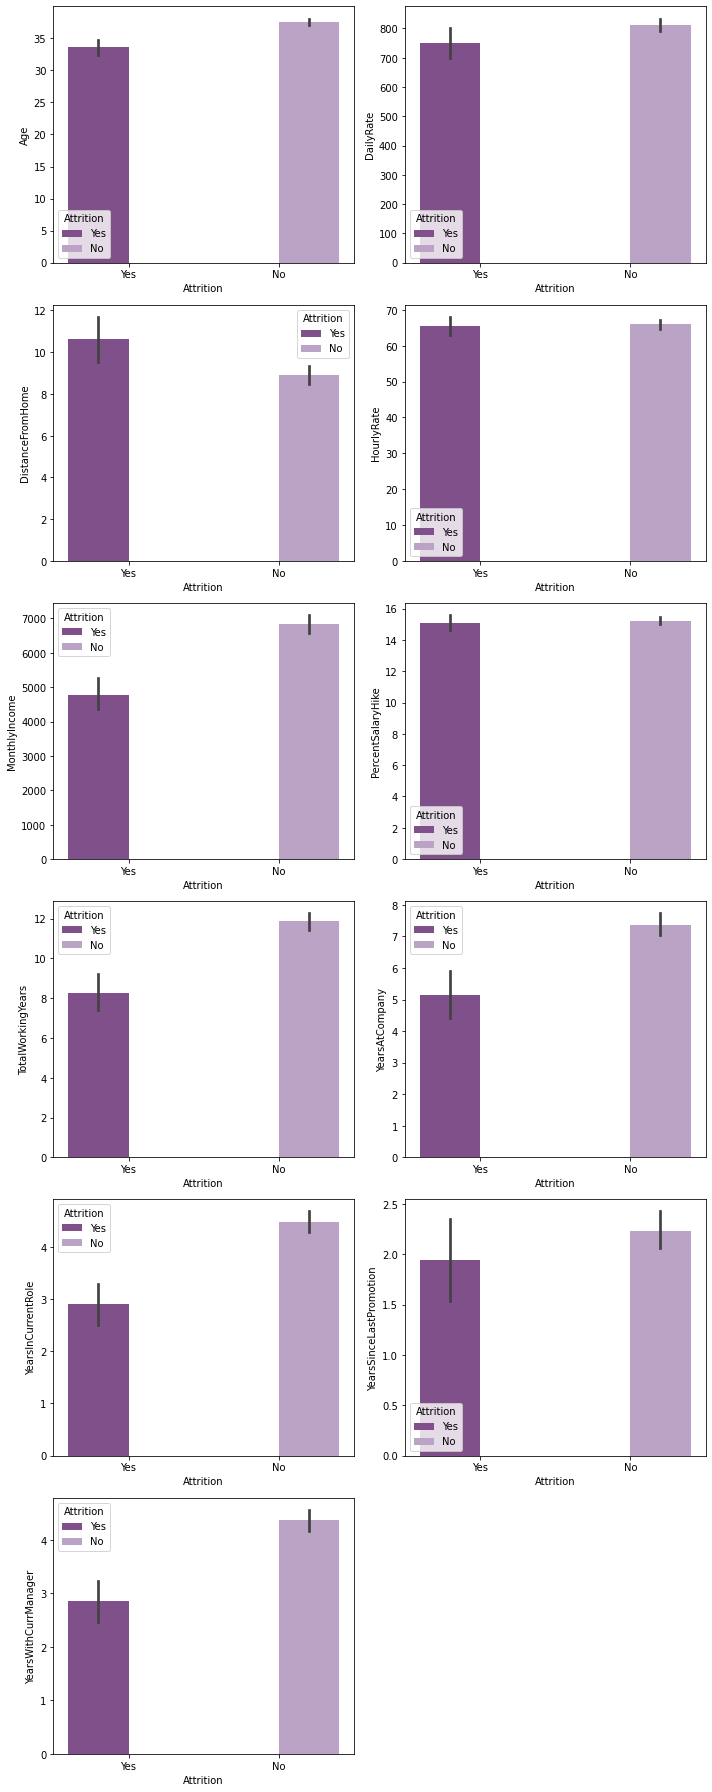

In [19]:
#plotting scatter plot with regression line for all independent columns with dependent columns 
a=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany',
   'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
plt.figure(figsize=(10,25))
for i,col in enumerate(a):
  plt.subplot(6,2,i+1)
  sn.set_palette('PRGn')
  sn.barplot(y=col,x='Attrition',hue='Attrition',data=df,)
  plt.tight_layout()

We are getting almost same information as explained above

## Multi variate analysis

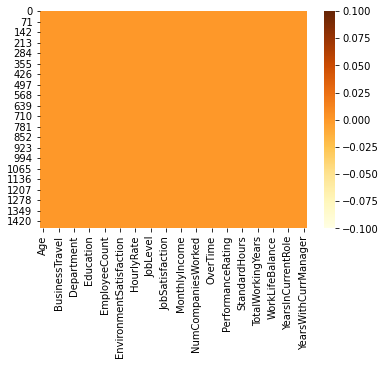

In [20]:
#ploting heat map to see wheather null value is present or not
sn.heatmap(df.isnull(),cmap='YlOrBr')

There is no null value present in our data set 

## LABEL ENCODING

In [21]:
#converting the catogorical values into numerical value
df_encode=df.copy()
cat_col=['Attrition',	'BusinessTravel',	'Department',	'EducationField',	'Gender',	'JobRole',	'MaritalStatus',	'Over18',	'OverTime']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in cat_col:
    df_encode.loc[:,i] = LE.fit_transform(df_encode.loc[:,i])

I have used the label encoder as there are no negative and float value 

In [22]:
#seeing correlation between the variables
dfcore=df_encode.corr()
dfcore

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


Lets plot the heat map to understand the corellation in easy maner

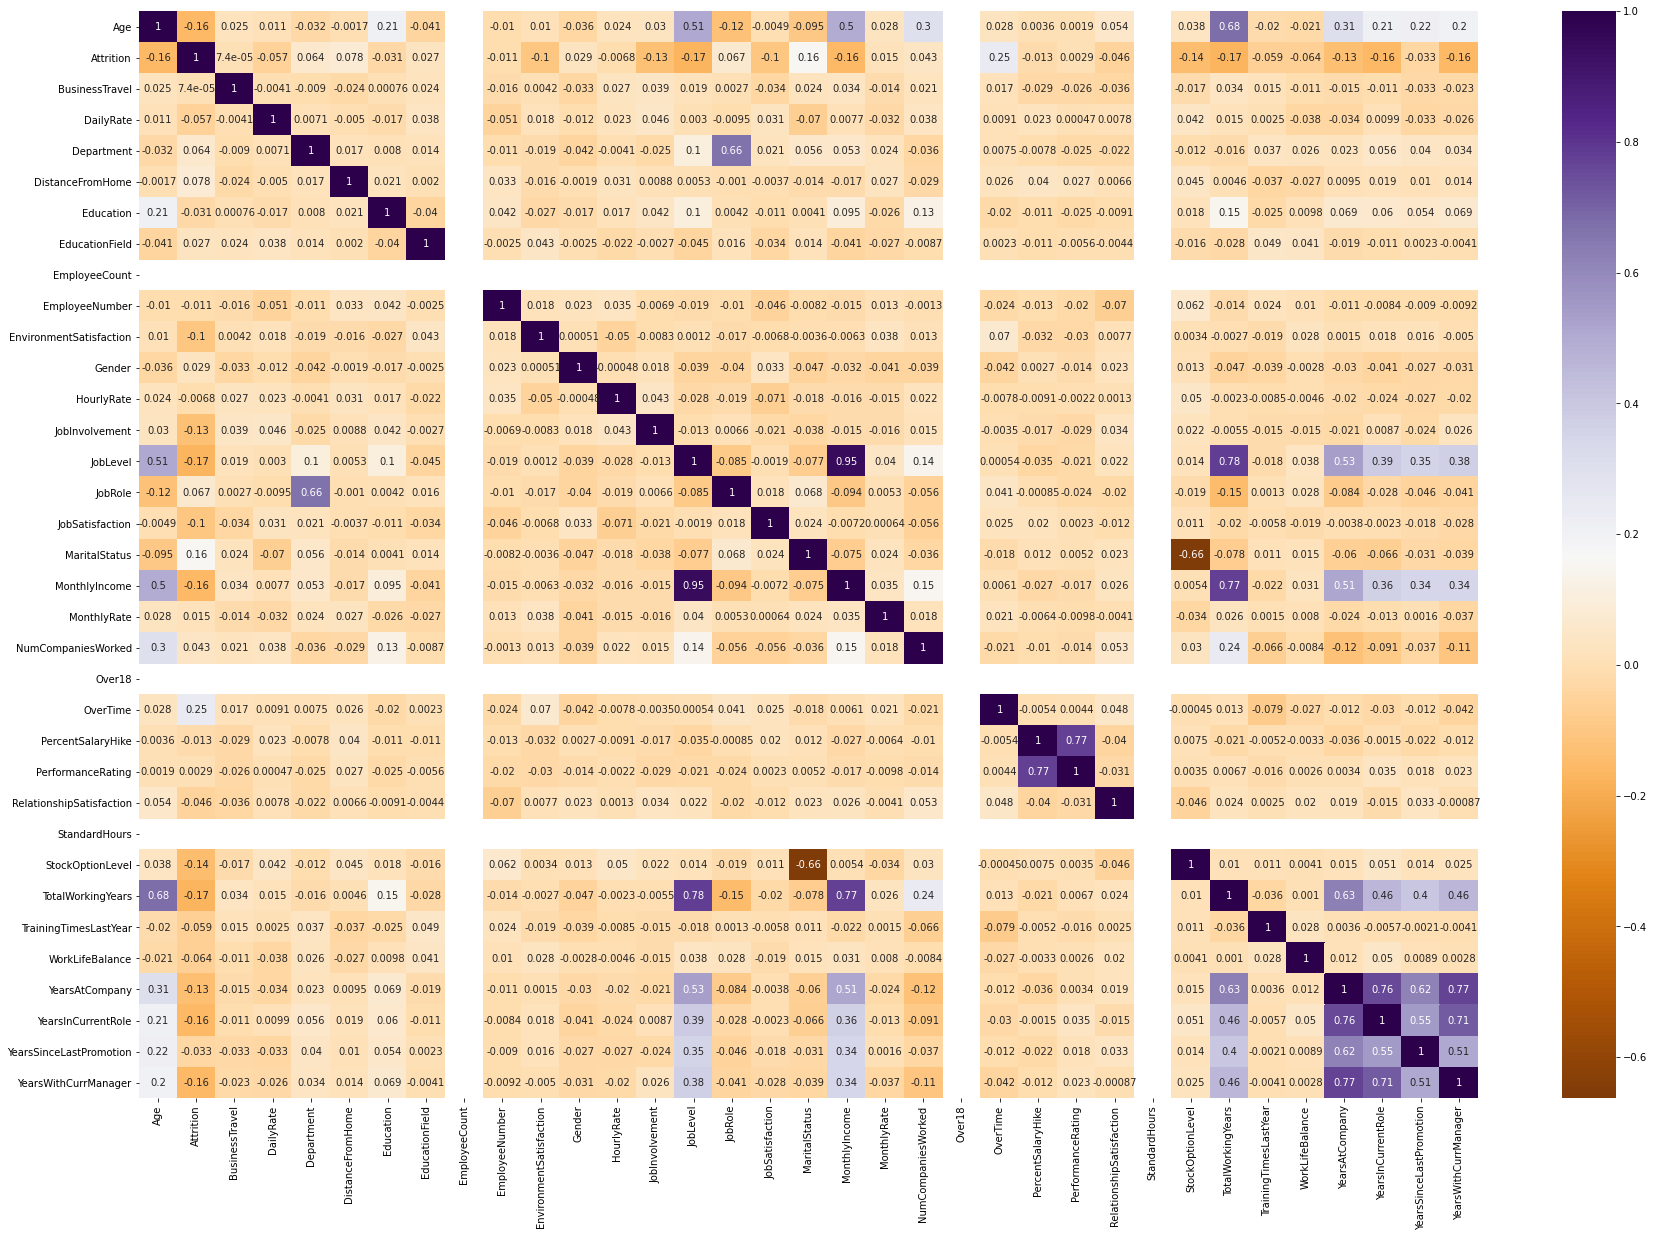

In [23]:
#ploting heat map for correlation matrix
plt.figure(figsize=(30,20))
sn.heatmap(dfcore,annot=True,cmap='PuOr')

Above we can see that

> dark orange represent the strong negative correlation

> dark purpal represent the strong positive correlation





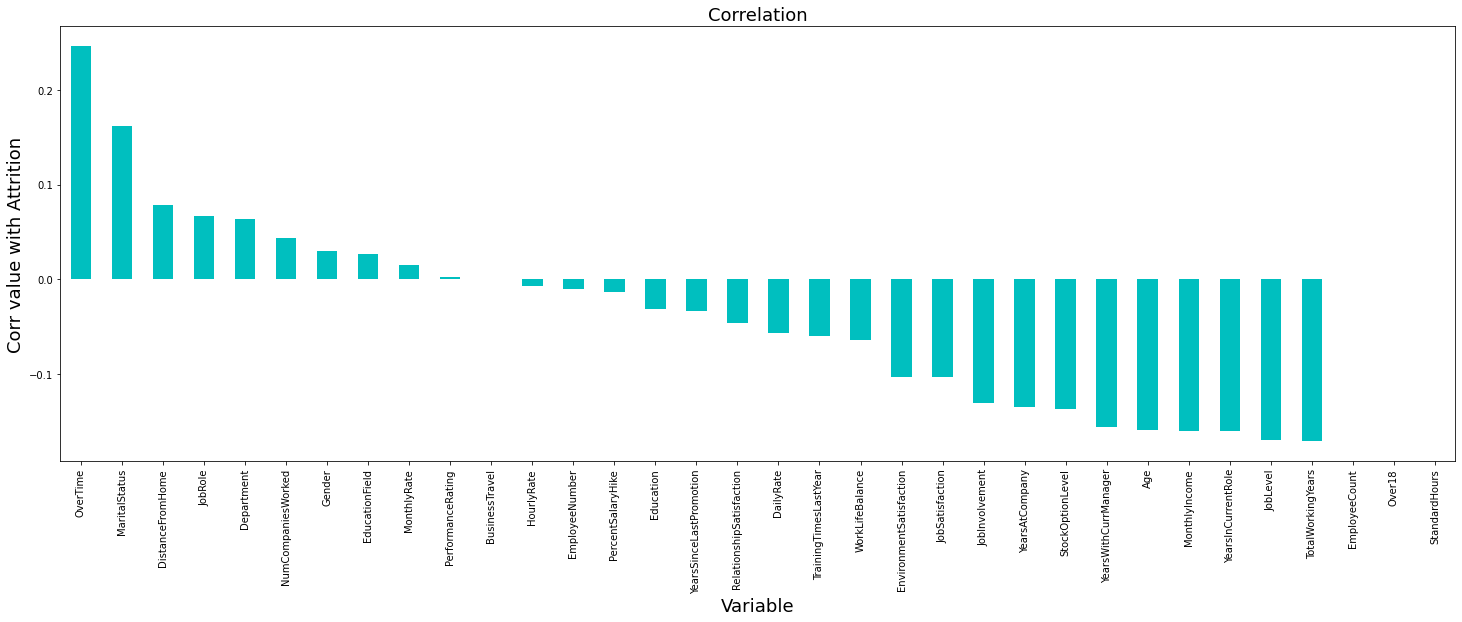

In [24]:
#seeing the correlation of each independent variable with dependent variable
plt.figure(figsize=(25,8))
df_encode.corr()['Attrition'].sort_values(ascending= False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Variable',fontsize=18)
plt.ylabel('Corr value with Attrition',fontsize=18)
plt.title('Correlation',fontsize=18)
plt.show()

Above we can see among all the variable 'Over time' is highly positively correlated and 'Total work experience' is highly negatively correlated with Attrition

## DATA CLEANING
# Droping the column

In [25]:
#droping the column
df_encode.drop(['EmployeeCount'],axis=1,inplace=True)
df_encode.drop(['EmployeeNumber'],axis=1,inplace=True)
df_encode.drop(['StandardHours'],axis=1,inplace=True)
df_encode.drop(['Over18'],axis=1,inplace=True)

We have droped 4 column has they are not having good corelation/ not so important in predicting

# Outlier removal

In [26]:
#copying our data incase if we loos a lot of data we can carry on with old data
dfdrop=df_encode.copy()

In [27]:
#removing outlier by z score method
from scipy.stats import zscore
z=np.abs(zscore(dfdrop))
dfdrop=dfdrop[(z<3).all(axis=1)]
print("Before removing outliers::",df_encode.shape)
print("After removing outliers::",dfdrop.shape)
p=100-(len(dfdrop.index)/len(df_encode.index)*100)
print(f'We are lossing {p} % of data.')

Before removing outliers:: (1470, 31)
After removing outliers:: (1387, 31)
We are lossing 5.646258503401356 % of data.


I am droping the outlier as i am loosing only 5.6 % of data

# Skewness removal

In [28]:
#checking the skewness
dfdrop.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [29]:
#Creating the dependent and independent variable 
x=dfdrop.drop('Attrition',axis=1)
y=dfdrop['Attrition']

In [30]:
#removing skewness by power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

We have removed the skewness 

# Scaling down the data

In [31]:
#applying standard scaling method on X variable 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

# Handeling the class imbalance

In [32]:
#applying over sampling on X and Y parameters 
from imblearn.over_sampling import SMOTE
ovs=SMOTE()
x_over,y_over=ovs.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape,'\n')

(2316, 30) 

(2316,)


We have handeled the class imbalance by over sampling 

# Building the modle 
## Selecting the best random state

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import 
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [42]:
#import library for model building
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

In [38]:
#selecting best random state
from sklearn.tree import DecisionTreeClassifier
maxA=0
maxR=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.33,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxA:
        maxA=acc
        maxR=i
print('Best accuracy is ',maxA,' on random state ',maxR)

Best accuracy is  0.8810457516339869  on random state  84


## **Building model using the Random Forest, Decision Tree classifier, SVC, Logistic Regression**

In [39]:
#building model using the Random Forest, Decision Tree classifier, SVC, Logistic Regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [40]:
#spliting the data set into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.33,random_state=84)

In [47]:
#Model building
model={RandomForestClassifier():"RandomForestClassifier", DecisionTreeClassifier():'DecisionTreeClassifier', SVC():'SVC', 
       LogisticRegression():'LogisticRegression'}
accscore=[]
crossvalidation=[]
for key in model:
  print("===== ",model.get(key),' model ===== ')
  key.fit(x_train,y_train)
  pred=key.predict(x_test)
  accs=accuracy_score(y_test,pred)
  print("Accuracy Score is ",accs,'\n')
  accscore.append(accs)
  cm=confusion_matrix(y_test,pred)
  print('confusion Matrix \n',cm,'\n')
  cr=classification_report(y_test,pred)
  print('Classification Report',cr)

  c=cross_val_score(key,x_over,y_over,cv=5)
  print('Cross validation score is',(np.abs(c)).mean(),'\n')
  crossvalidation.append((np.abs(c)).mean())
  print('\n\n\n')

=====  RandomForestClassifier  model ===== 
Accuracy Score is  0.934640522875817 

confusion Matrix 
 [[345  20]
 [ 30 370]] 

Classification Report               precision    recall  f1-score   support

           0       0.92      0.95      0.93       365
           1       0.95      0.93      0.94       400

    accuracy                           0.93       765
   macro avg       0.93      0.94      0.93       765
weighted avg       0.94      0.93      0.93       765

Cross validation score is 0.9370242794369552 





=====  DecisionTreeClassifier  model ===== 
Accuracy Score is  0.8758169934640523 

confusion Matrix 
 [[305  60]
 [ 35 365]] 

Classification Report               precision    recall  f1-score   support

           0       0.90      0.84      0.87       365
           1       0.86      0.91      0.88       400

    accuracy                           0.88       765
   macro avg       0.88      0.87      0.88       765
weighted avg       0.88      0.88      0.88       7

In [49]:
#selecting the best model from the above model
Modelselection=pd.DataFrame({})
Modelselection['Model_Name']=['RandomForestClassifier','DecisionTreeClassifier', 'SVC','LogisticRegression']
Modelselection['Accuracy Score']=accscore
Modelselection['Cross Validation']=crossvalidation
Modelselection['Diff of Acc_Score and Cross_Val']=abs(Modelselection['Accuracy Score']-Modelselection['Cross Validation'])
Modelselection

,Model_Name,Accuracy Score,Cross Validation,Diff of Acc_Score and Cross_Val
0,RandomForestClassifier,0.934641,0.937024,0.002384
1,DecisionTreeClassifier,0.875817,0.846331,0.029486
2,SVC,0.904575,0.915813,0.011238
3,LogisticRegression,0.802614,0.792314,0.010300


We can see from above tabel that the RandomForestClassifier has got high accuracy of 93% with minimum deviation of 0.2 %. So we are selecting the RandomForestClassifier as our best model and we will carry out the Hyper Parameter Testing for that model


In [70]:
#Hyper parameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

p1={'max_features':['auto','sqrt'],'criterion': ['gini','entropy'],'max_depth':np.arange(2,20)}
p2={'oob_score':['True'],'class_weight':['balanced','balanced_subsample'],'max_leaf_nodes':np.arange(1,30,5)}
p=[p1,p2]
for i in p:
  r_f=RandomForestClassifier()
  clf=GridSearchCV(r_f,i)
  clf.fit(x_train,y_train)
  print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto'}
{'class_weight': 'balanced', 'max_leaf_nodes': 26, 'oob_score': 'True'}


We have carried out hyper parameter testing with 2 set containing 3 parameter each we have got 2 best parameter and now I will be building the 2 mobel using the best parameter

MODEL 1

In [71]:
#tuning using 1st set best parameter
model_1=RandomForestClassifier(criterion='gini', max_depth=16, max_features='auto')
model_1.fit(x_train,y_train)
pred=model_1.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(model_1,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.9437908496732026 

confusion Matrix 
 [[348  17]
 [ 26 374]] 

Classification Report               precision    recall  f1-score   support

           0       0.93      0.95      0.94       365
           1       0.96      0.94      0.95       400

    accuracy                           0.94       765
   macro avg       0.94      0.94      0.94       765
weighted avg       0.94      0.94      0.94       765

Cross validation score is 0.9365960378342146 



Model 2

In [73]:
#tuning using 2st set best parameter
model_2=RandomForestClassifier(class_weight='balanced', max_leaf_nodes=26, oob_score=True)
model_2.fit(x_train,y_train)
pred=model_2.predict(x_test)
accs=accuracy_score(y_test,pred)
print("Accuracy Score is ",accs,'\n')
cm=confusion_matrix(y_test,pred)
print('confusion Matrix \n',cm,'\n')
cr=classification_report(y_test,pred)
print('Classification Report',cr)
c=cross_val_score(model_2,x_over,y_over,cv=5)
print('Cross validation score is',(np.abs(c)).mean(),'\n')

Accuracy Score is  0.8849673202614379 

confusion Matrix 
 [[323  42]
 [ 46 354]] 

Classification Report               precision    recall  f1-score   support

           0       0.88      0.88      0.88       365
           1       0.89      0.89      0.89       400

    accuracy                           0.88       765
   macro avg       0.88      0.88      0.88       765
weighted avg       0.89      0.88      0.88       765

Cross validation score is 0.879159529306621 



We can see that the model accuracy has increased to 94% in Model 1 after hyper parameter tuning, So Model 1 is our model and now lets draw ROC AUC Curve for that

In [75]:
#plotting roc_auc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=model_1.predict_proba(x_test)[:,1]
frp,tpr,thresholds=roc_curve(y_test,y_pred_prob)

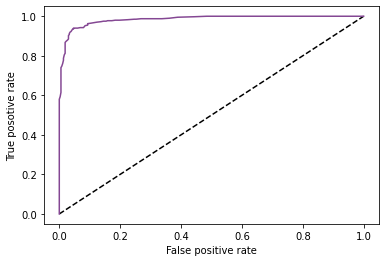

auc_score :  0.9442123287671232


In [79]:
plt.plot([0,1],[0,1],'k--')
plt.plot(frp,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.show()
auc_score=roc_auc_score(y_test,model_1.predict(x_test))
print('auc_score : ',auc_score)

Our Final model is **model_1** with acurracy of 94.37% with Auc_Score of 94.42%

# Saving the model

In [80]:
#saving the model
import joblib
joblib.dump(model_1,'FinalModel.pk1')

['FinalModel.pk1']